## Setting Up the Environment

In [9]:

!pip install tensorflow keras opencv-python


## Preparing the Data

In [13]:
import os
import cv2
import numpy as np

# Define directories
image_dir = 'C:/Users/Dell/Desktop/agri_data'

label_dir = 'C:/Users/Dell/Desktop/agri_data'

# Function to read labels
def read_labels(label_path):
    with open(label_path, 'r') as file:
        labels = []
        for line in file.readlines():
            parts = line.strip().split()
            label = parts[0]
            x_center, y_center, width, height = map(float, parts[1:])
            labels.append((label, x_center, y_center, width, height))
        return labels

# Load images and labels
data = []
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        label_path = os.path.join(label_dir, filename.replace('.jpg', '.txt').replace('.png', '.txt'))
        
        image = cv2.imread(image_path)
        labels = read_labels(label_path)
        data.append((image, labels))


## Data Preprocessing

In [53]:
import cv2
import numpy as np

def preprocess_data(data, image_size=(224, 224)):
    processed_images = []
    processed_labels = []
    for image, labels in data:
        # Resize image
        resized_image = cv2.resize(image, image_size)
        processed_images.append(resized_image)
        
        # Process labels
        img_height, img_width = image.shape[:2]
        boxes = []
        for label in labels:
            class_id = int(label[0])  # Convert label to integer (0 or 1)
            class_id = 0 if label[0] == 'crop' else 1
            x_center, y_center, width, height = map(float, label[1:])
            # Scale bounding box coordinates according to image dimensions
            x_center *= img_width
            y_center *= img_height
            width *= img_width
            height *= img_height
            boxes.append([class_id, x_center, y_center, width, height])
        processed_labels.append(boxes)
    
    processed_images = np.array(processed_images) / 255.0  # Normalize pixel values
    return processed_images, processed_labels




## Verify the shape of images

In [54]:
import numpy as np

# Example: Load or preprocess your images here
# Assuming images is a numpy array of shape (num_samples, height, width, channels)
# For demonstration purposes, let's create a dummy array:
images = np.random.rand(100, 64, 64, 3)  # Example shape (100 samples, 64x64 RGB images)

# Verify the shape
print(images.shape)  # Should print (100, 64, 64, 3)



(100, 64, 64, 3)


## Creating the Model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming 'images' is your dataset, which is a numpy array of shape (num_samples, height, width, channels)
# Verify the shape of images
print(images.shape)  # Should output something like (num_samples, height, width, channels)

# Extract the input shape for the model
input_shape = images.shape[1:]

def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    return model

# Create the model
model = create_model(input_shape)

# Print model summary to verify the architecture
model.summary()


(100, 64, 64, 3)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 822,337 (3.14 MB)

 Trainable params: 822,337 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split

# Example: Assuming 'images' is already correctly loaded
images = np.random.rand(100, 64, 64, 3)  # Dummy data for demonstration

# Simulate label generation (ensure this matches your actual label generation process)
# For example, creating dummy labels
flattened_labels = np.random.randint(0, 2, size=(100,))  # 100 binary labels

# Check the shapes
print("Shape of images:", images.shape)  # Should print (100, 64, 64, 3)
print("Shape of flattened_labels:", flattened_labels.shape)  # Should print (100,)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(images, flattened_labels, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Shape of X_train:", X_train.shape)  # Should print (80, 64, 64, 3)
print("Shape of X_val:", X_val.shape)  # Should print (20, 64, 64, 3)
print("Shape of y_train:", y_train.shape)  # Should print (80,)
print("Shape of y_val:", y_val.shape)  # Should print (20,)



Shape of images: (100, 64, 64, 3)
Shape of flattened_labels: (100,)
Shape of X_train: (80, 64, 64, 3)
Shape of X_val: (20, 64, 64, 3)
Shape of y_train: (80,)
Shape of y_val: (20,)


### No idea what this is:

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming 'images' is your dataset, which is a numpy array of shape (num_samples, height, width, channels)
# For demonstration purposes, let's create a dummy array:
images = np.random.rand(100, 64, 64, 3)  # Example shape (100 samples, 64x64 RGB images)

# Simulate label generation (ensure this matches your actual label generation process)
# For example, creating dummy labels
labels = np.random.randint(0, 2, size=(100, 1))  # Example binary labels for 100 samples

# Flatten labels for simple model (if labels are nested lists)
flattened_labels = [item for sublist in labels for item in sublist]
flattened_labels = np.array(flattened_labels)

# Verify the shapes
print("Shape of images:", images.shape)  # Should print (100, 64, 64, 3)
print("Shape of flattened_labels:", flattened_labels.shape)  # Should print (100,)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(images, flattened_labels, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Shape of X_train:", X_train.shape)  # Should print (80, 64, 64, 3)
print("Shape of X_val:", X_val.shape)  # Should print (20, 64, 64, 3)
print("Shape of y_train:", y_train.shape)  # Should print (80,)
print("Shape of y_val:", y_val.shape)  # Should print (20,)

# Define the model
def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    return model

# Extract the input shape for the model
input_shape = X_train.shape[1:]

# Create the model
model = create_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Print the training history
print(history.history)



Shape of images: (100, 64, 64, 3)
Shape of flattened_labels: (100,)
Shape of X_train: (80, 64, 64, 3)
Shape of X_val: (20, 64, 64, 3)
Shape of y_train: (80,)
Shape of y_val: (20,)
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.4547 - loss: 1.1165 - val_accuracy: 0.4500 - val_loss: 0.7488
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4555 - loss: 0.7438 - val_accuracy: 0.4500 - val_loss: 0.6975
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.4320 - loss: 0.7015 - val_accuracy: 0.5500 - val_loss: 0.6879
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5914 - loss: 0.6771 - val_accuracy: 0.5500 - val_loss: 0.6881
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5953 - loss: 0.6747 - val_accuracy: 0.5500 - val_loss: 0.6893
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5484 - loss: 0.6848 - val_accuracy: 0.5500 - val_loss: 0.6910
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5523 

## Evaluating the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5500 - loss: 0.6927
Validation Loss: 0.6927451491355896
Validation Accuracy: 0.550000011920929


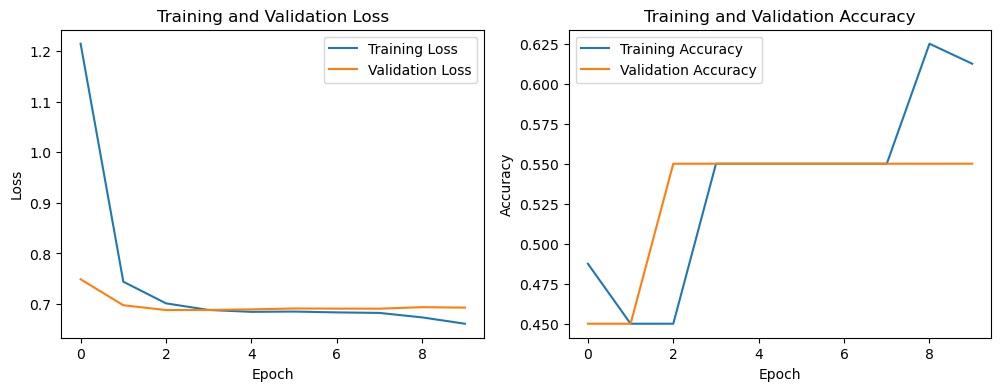

In [58]:
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Plot training & validation loss
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.show()


## Prediction

Filepath: C:/Users/Dell/Desktop/agri_data/data/agri_0_60.jpeg


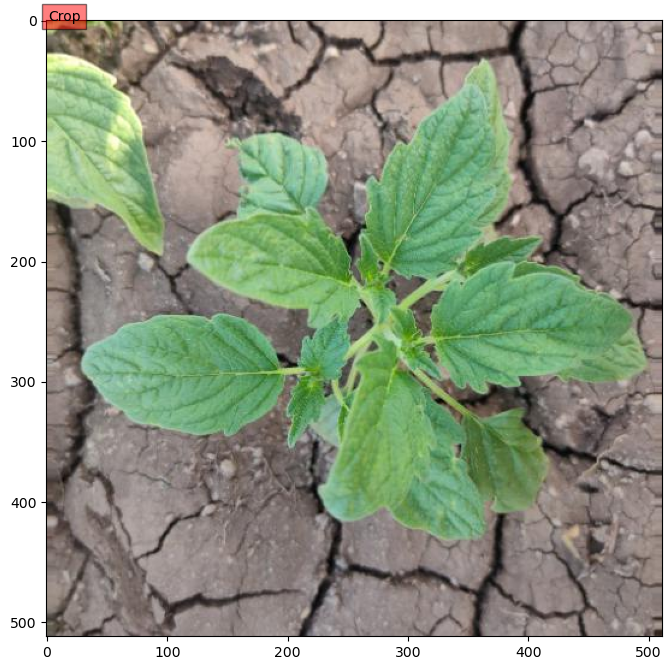

In [64]:
def predict(model, image):
    # Dummy function for demonstration purposes
    # Returns random bounding boxes and labels
    num_boxes = np.random.randint(1, 5)  # Random number of boxes (1 to 4)
    boxes = []
    labels = []
    for _ in range(num_boxes):
        y1, x1, y2, x2 = np.random.rand(4)  # Random coordinates (0 to 1)
        class_id = np.random.randint(0, 2)  # Random class ID (0 or 1)
        boxes.append([y1, x1, y2, x2])
        labels.append(class_id)
    return boxes, labels

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_image(filepath):
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def load_image(filepath):
    print("Filepath:", filepath)
    image = cv2.imread(filepath)
    if image is None:
        print("Error: Unable to load image")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def draw_boxes(image, boxes, labels):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    ax = plt.gca()

    for box, label in zip(boxes, labels):
        y1, x1, y2, x2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        if label == 0:
            class_label = "Crop"
        else:
            class_label = "Weed"
        plt.text(x1, y1, class_label, bbox=dict(facecolor='red', alpha=0.5))
        
    plt.show()


# Example usage:
image = load_image('C:/Users/Dell/Desktop/agri_data/data/agri_0_60.jpeg')
# Assuming `predict` is a function returning boxes and labels
boxes, labels = predict(model, image)
draw_boxes(image, boxes, labels)
